In [16]:
def thinning(image, A, B):
    for i in range(len(A)):
        eroded = cv2.erode(image, A[i])
        dilate = cv2.dilate(image, np.logical_not(B[i]).astype(np.uint8))
        temp = np.bitwise_and(eroded, np.logical_not(dilate)).astype(np.uint8)
        image = np.bitwise_and(image, np.logical_not(temp).astype(np.uint8))
    return image

In [17]:
def sfeleton_with_thinning(image, A, B):
    X_first = image
    X = thinning(X_first, A, B)
    count = 0
    while np.max(np.abs(X_first - X)) != 0:
        X_first = X
        X = thinning(X_first, A, B)
    return X

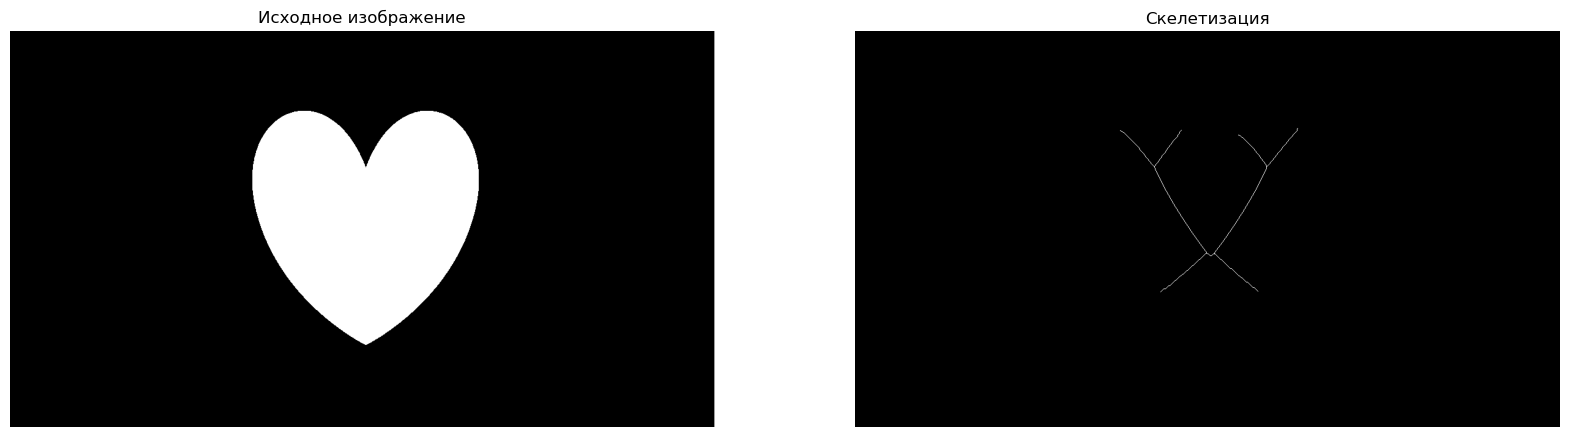

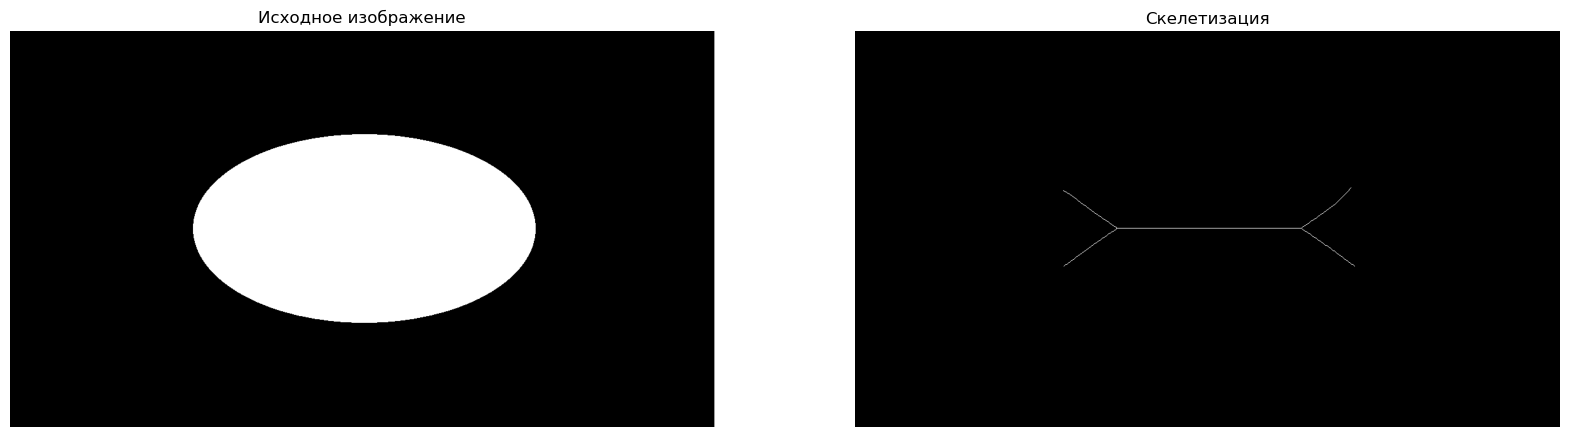

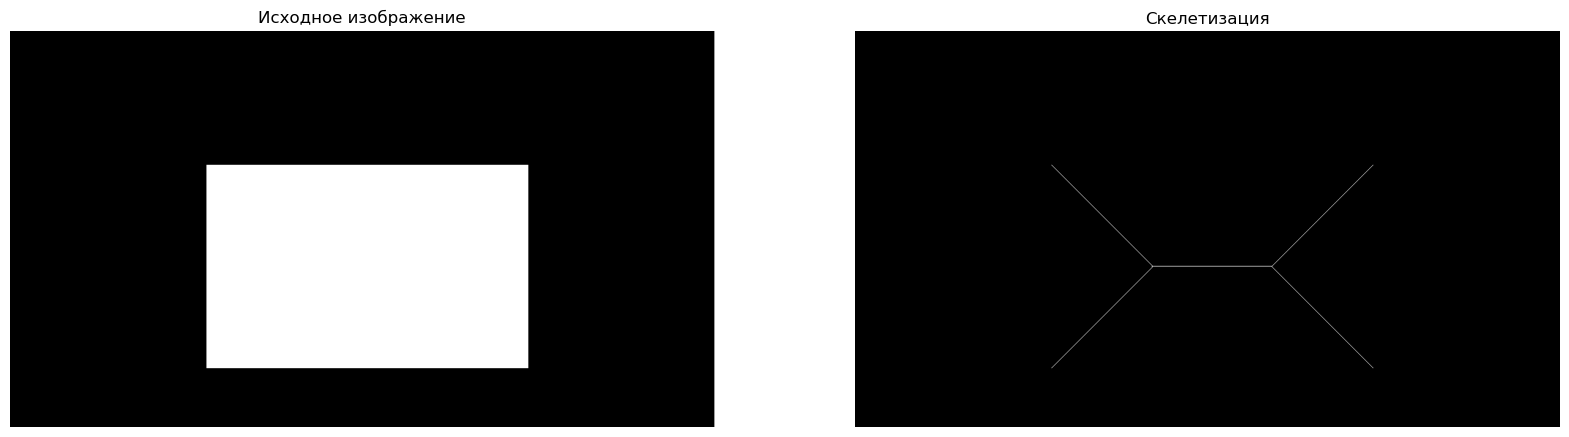

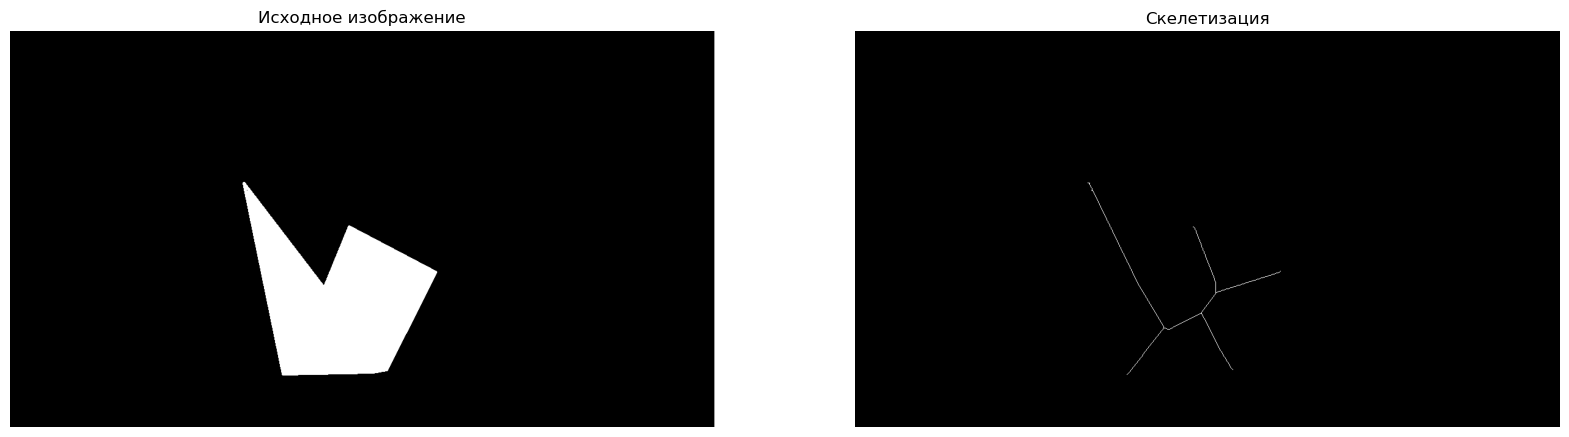

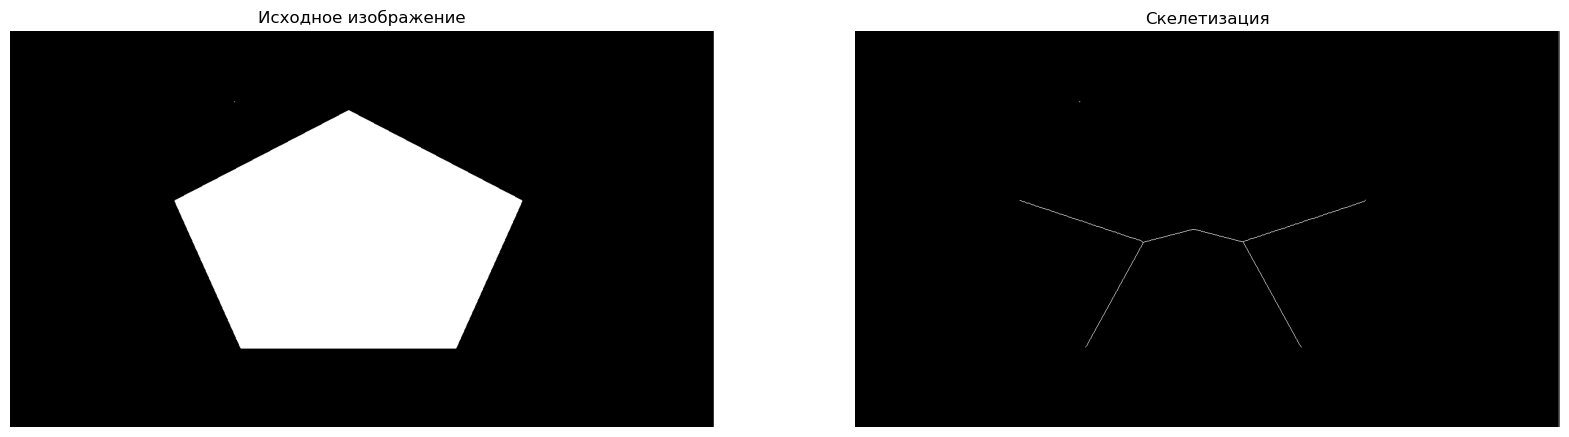

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image_1 = cv2.imread('heart.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('oval.png', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('rectangle.png', cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)
image_5 = cv2.imread('image3.png', cv2.IMREAD_GRAYSCALE)

images = [image_1, image_2, image_3, image_4, image_5]

A_1 = np.array([[1, 1, 1],
                [0, 1, 0],
                [0, 0, 0]], dtype=np.uint8)
B_1 = np.array([[1, 1, 1],
                [1, 1, 1],
                [0, 0, 0]], dtype=np.uint8)

A_2 = np.array([[1, 0, 0],
                [1, 1, 0],
                [1, 0, 0]], dtype=np.uint8)
B_2 = np.array([[1, 1, 0],
                [1, 1, 0],
                [1, 1, 0]], dtype=np.uint8)

A_3 = np.array([[0, 0, 0],
                [0, 1, 0],
                [1, 1, 1]], dtype=np.uint8)
B_3 = np.array([[0, 0, 0],
                [1, 1, 1],
                [1, 1, 1]], dtype=np.uint8)

A_4 = np.array([[0, 0, 1],
                [0, 1, 1],
                [0, 0, 1]], dtype=np.uint8)
B_4 = np.array([[0, 1, 1],
                [0, 1, 1],
                [0, 1, 1]], dtype=np.uint8)

A_5 = np.array([[0, 1, 0],
                [0, 1, 1],
                [0, 0, 0]], dtype=np.uint8)
B_5 = np.array([[1, 1, 1],
                [0, 1, 1],
                [0, 0, 1]], dtype=np.uint8)

A_6 = np.array([[0, 1, 0],
                [1, 1, 0],
                [0, 0, 0]], dtype=np.uint8)
B_6 = np.array([[1, 1, 1],
                [1, 1, 0],
                [1, 0, 0]], dtype=np.uint8)

A_7 = np.array([[0, 0, 0],
                [1, 1, 0],
                [0, 1, 0]], dtype=np.uint8)
B_7 = np.array([[1, 0, 0],
                [1, 1, 0],
                [1, 1, 1]], dtype=np.uint8)

A_8 = np.array([[0, 0, 0],
                [0, 1, 1],
                [0, 1, 0]], dtype=np.uint8)
B_8 = np.array([[0, 0, 1],
                [0, 1, 1],
                [1, 1, 1]], dtype=np.uint8)

A = [A_1, A_2, A_3, A_4, A_5, A_6, A_7, A_8]
B = [B_1, B_2, B_3, B_4, B_5, B_6, B_7, B_8]

for image in images:
    skeleton = sfeleton_with_thinning(image, A, B)

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(skeleton, cmap='gray')
    axes[1].set_title('Скелетизация')
    axes[1].axis('off')

plt.show()